In [7]:
import random

from context import bowman
from bowman import triangulation
from triangulation import Triangulation
from bowman import unfolding
from bowman import rational_ht_application
from bowman import geom_equiv

# Square Torus

In [13]:
X = Triangulation.square_torus()
X.generators_veech

ValueError: Initial IDR has self-equivalences

In [2]:
w = 9

In [3]:
X = Triangulation.prym_eigenform_type_aplus(w, 1, 0, 0)
gens = X.generators_veech.gens

In [4]:
shear_horiz = next(gen for gen in gens
                   if gen[0][0]== 1
                   if gen[1][0] == 0
                   if gen[0][1] > 0)
shear_vert = next(gen for gen in gens
                   if gen[0][0]== 1
                   if gen[0][1] == 0
                   if gen[1][0] > 0)
shear_horiz, shear_vert

(
[1 9]  [         1          0]
[0 1], [1/18*a + 1          1]
)

# Gothic Locus

In [5]:
def num_ideal_vertices(r):
    return sum(edge.start == oo or edge.start.v2 == 0 for edge in r.polygon)

In [6]:
G = unfolding.triangulate_gothic1119(QQ(-1/4))
cx = G.iso_delaunay_complex(300)
any(num_ideal_vertices(r) > 1 for r in cx)

False

In [2]:
def sigma(m):
    [[a, b], [c, d]] = m
    return matrix([[a, -b], [-c , d]])

# D = 8

In [8]:
prym8_real = Triangulation.prym_eigenform_type_b_disc_8_real()
fund_dom = prym8_real.generators_veech
g1, g2 = fund_dom.gens

## With fake cone points: 

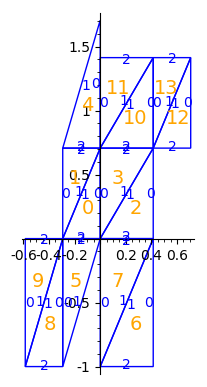

In [35]:
prym8_fake = Triangulation.prym_eigenform_type_b_disc_8_fake()
prym8_fake.plot().show()
k.<a> = QuadraticField(8)
shear_horiz = matrix(k, [[1, 1], [0, 1]])
shear_vert = matrix(k, [[1, 0], [a + 3, 1]])

In [36]:
segments = rational_ht_application.bicuspid_segments(prym8_fake)
constraints_dict = rational_ht_application.segments_for_plotting(segments)

Completed triangulation.


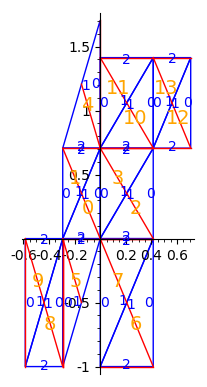

In [37]:
prym8_fake_con = prym8_fake.plot_constraints(constraints_dict)
prym8_fake_con.plot().show()

()
()
()
()
()
()
()
()
()
()
()
()
()
()


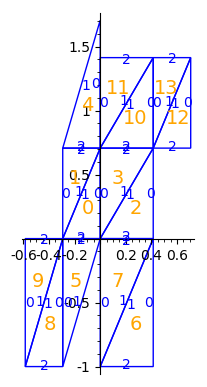

In [38]:
prym8_fake = prym8_fake.mark_point(0, (1, 0, 0), (1, 0, 0))
for tri in prym8_fake.triangles:
    print(tri.points_marked)
prym8_fake.plot()

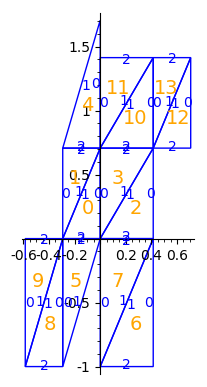

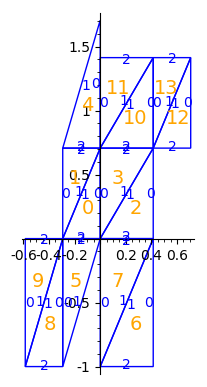

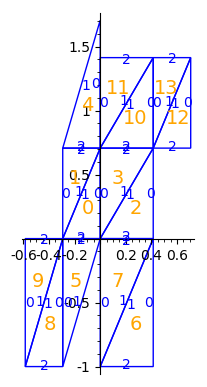

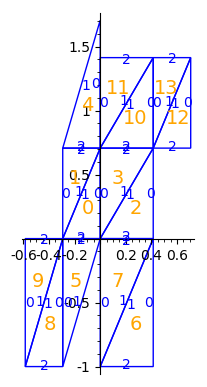

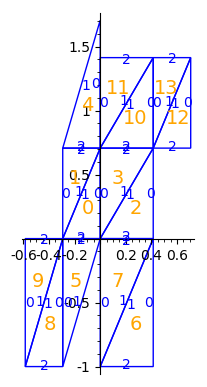

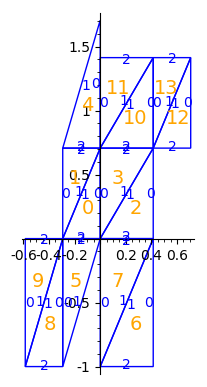

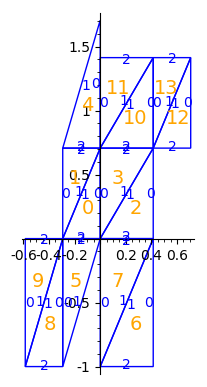

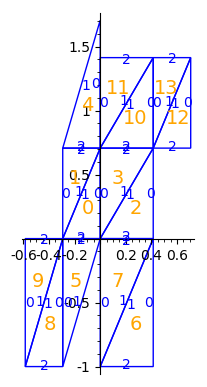

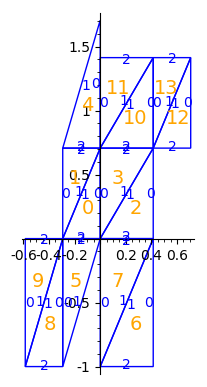

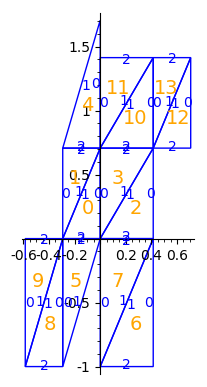

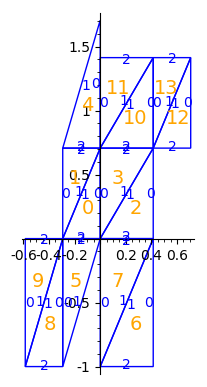

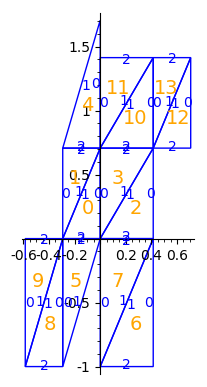

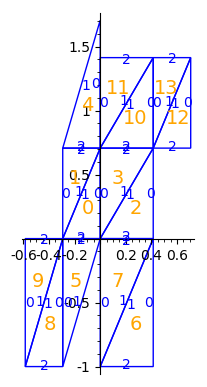

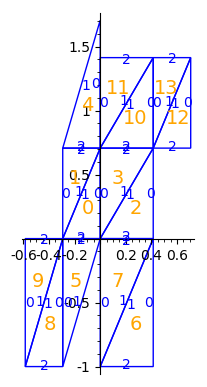

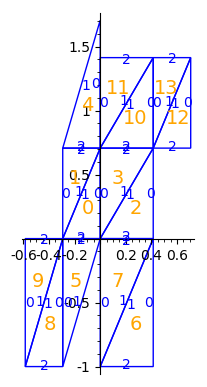

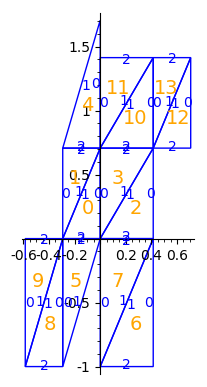

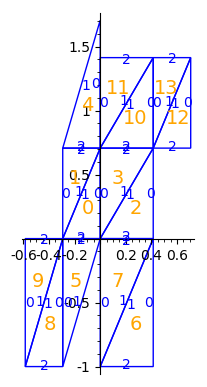

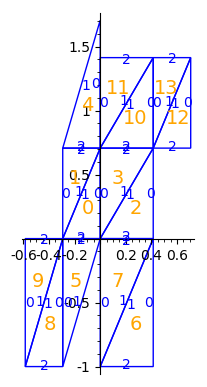

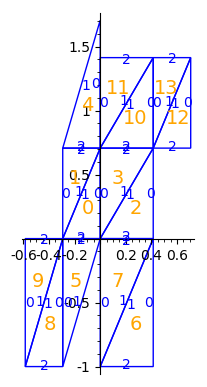

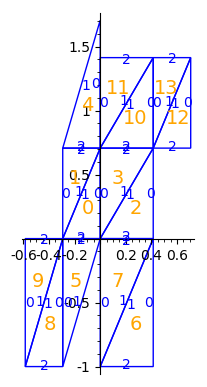

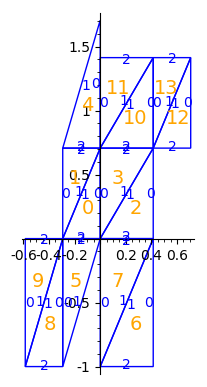

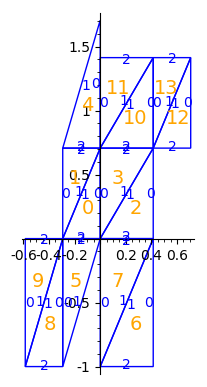

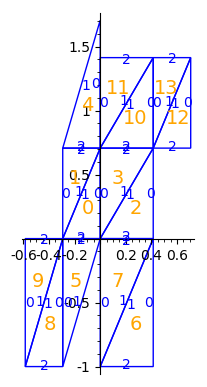

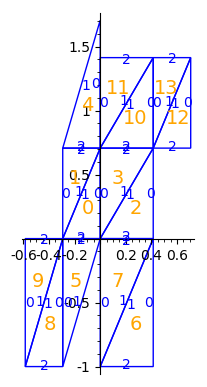

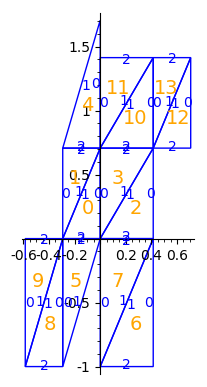

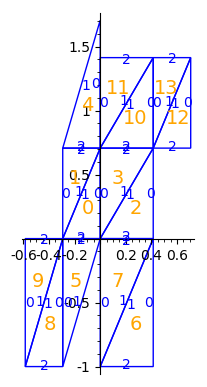

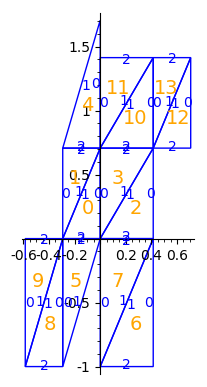

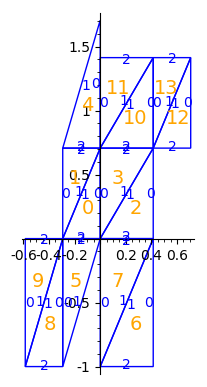

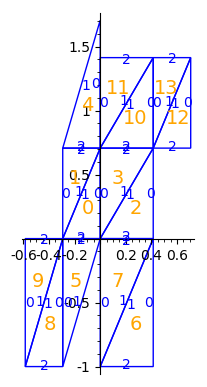

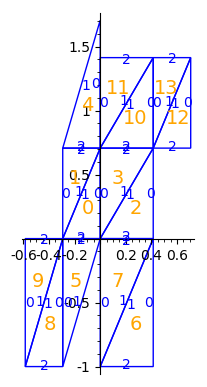

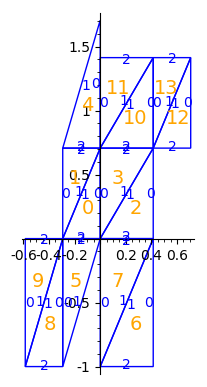

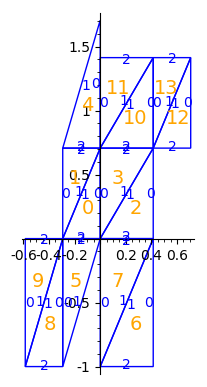

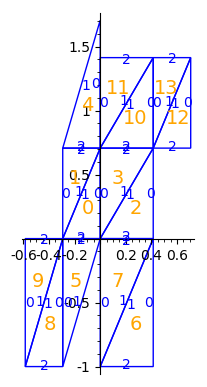

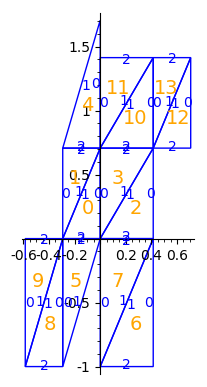

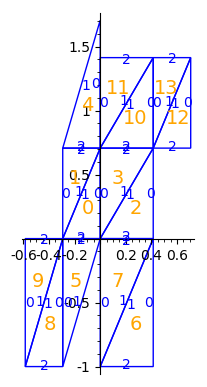

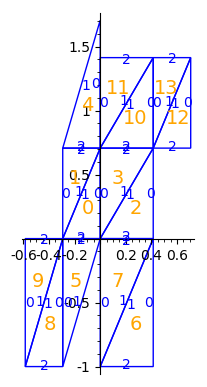

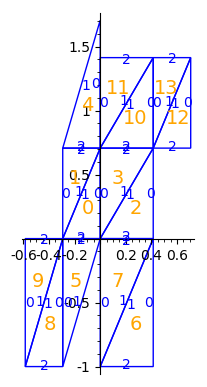

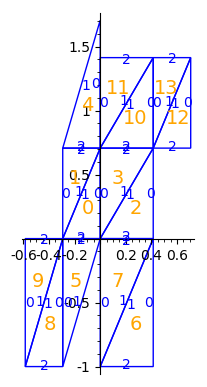

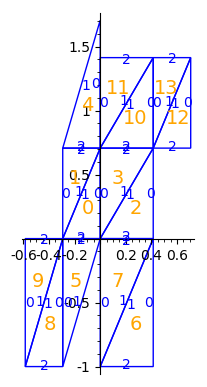

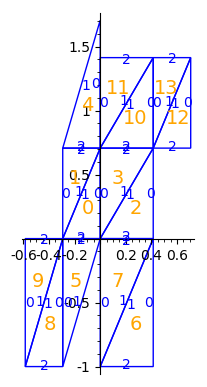

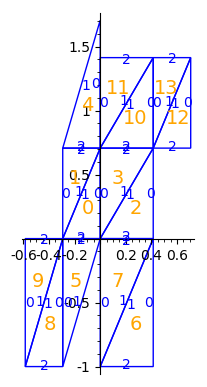

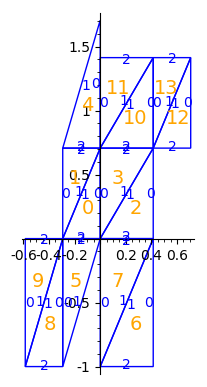

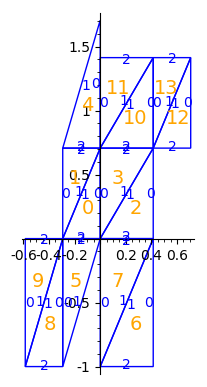

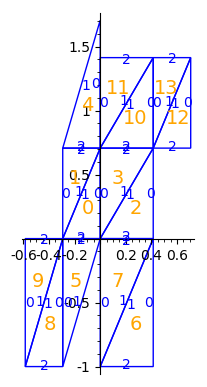

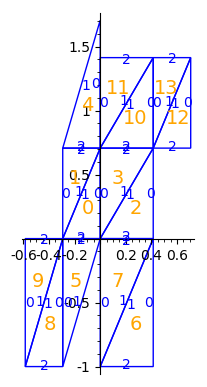

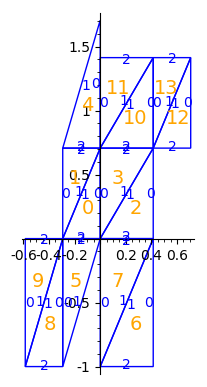

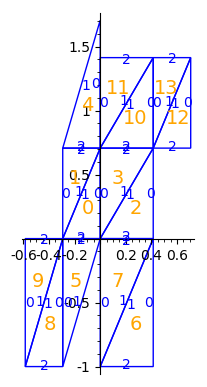

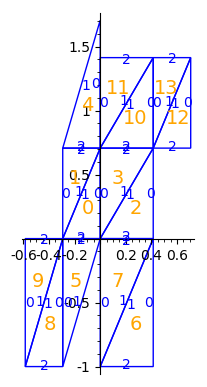

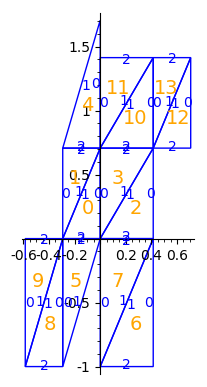

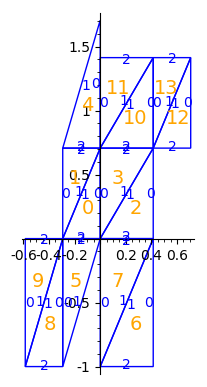

In [19]:
idx_old, coords_old = 0, (1, 0, 0)
for _ in range(50):
    m = sigma(g1) if random.randint(0, 1) == 0 else sigma(g2)
    _, idx_new, coords_new = prym8_fake.track_marked_point(coords_old, idx_old, m)
    prym8_fake = prym8_fake.mark_point(idx_new, coords_new, (1, 0, 0))
    prym8_fake.plot().show()
    idx_old, coords_old = idx_new, coords_new

## with real cone points:

In [9]:
v0, v1, v2 = prym8_real.triangles[1]
t = abs((-v0) * (v1 / v1.norm())) / v1.norm()

In [11]:
idx_old, coords_old = 1, (0, 1 - t, t)
for _ in range(50):
    m = sigma(g1) if random.randint(0, 1) == 0 else sigma(g2)
    idx_new, coords_new = prym8_real.track_marked_point(coords_old, idx_old, m)
    prym8_real = prym8_real.mark_point(idx_new, coords_new, (1, 0, 0))
    prym8_real.plot().show()
    idx_old, coords_old = idx_new, coords_new

ValueError: too many values to unpack (expected 2)